# Importing Libraries and Data

In [53]:
import pandas as pd
import seaborn as sns

In [23]:
###### ELIMINATE the data that you are not using yet
advanced = pd.read_csv('./data/general_advanced', index_col=0)
touches = pd.read_csv('./data/tracking_touches', index_col=0)
drives = pd.read_csv('./data/tracking_drives', index_col=0)
defensive_impact = pd.read_csv('./data/tracking_defensive_impact', index_col=0)
passing = pd.read_csv('./data/tracking_passing', index_col=0)
shooting_efficiency = pd.read_csv('./data/tracking_shooting_efficiency', index_col=0)
speed_distance = pd.read_csv('./data/tracking_speed_distance', index_col=0)
rebounding = pd.read_csv('./data/tracking_rebounding', index_col=0)
catch_shoot = pd.read_csv('./data/tracking_catch_shoot', index_col=0)
pullup_shooting = pd.read_csv('./data/tracking_pullup_shooting', index_col=0)
elbow_touches = pd.read_csv('./data/tracking_elbow_touches', index_col=0)
post_ups = pd.read_csv('./data/tracking_post_ups', index_col=0)
paint_touches = pd.read_csv('./data/tracking_paint_touches', index_col=0)
offensive_rebounding = pd.read_csv('./data/tracking_offensive_rebounding', index_col=0)
defensive_rebounding = pd.read_csv('./data/tracking_defensive_rebounding', index_col=0)
hustle = pd.read_csv('./data/hustle', index_col=0)

# Looking Over the Potential Predicted Stats

In [24]:
# Making it possible to fully view the dataframes
pd.options.display.max_columns = 25

### 'Touches' Stats

The post and paint categories seem to have overlap, so big men tend to have overestimated points. On the flip side, there seem to be missing situations, so many guards having underestimated points.

In [25]:
elbow_points = touches['ELBOW_TOUCHES'] * touches['PTS_PER_ELBOW_TOUCH'] 
post_points = touches['POST_TOUCHES'] * touches['PTS_PER_POST_TOUCH']
paint_points = touches['PAINT_TOUCHES'] * touches['PTS_PER_PAINT_TOUCH']
touch_points = elbow_points + post_points + paint_points
touches[touch_points > touches['POINTS']].head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,POINTS,TOUCHES,FRONT_CT_TOUCHES,TIME_OF_POSS,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,PTS_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,PTS_PER_ELBOW_TOUCH,PTS_PER_POST_TOUCH,PTS_PER_PAINT_TOUCH
22,101106,Andrew Bogut,1610612747,LAL,24,7,17,9.0,1.5,15.1,8.2,0.4,1.69,0.53,0.099,1.3,0.3,2.0,0.188,0.000,0.750
42,1626246,Boban Marjanovic,1610612746,LAC,39,18,21,8.7,6.0,13.3,8.8,0.4,1.65,0.36,0.453,1.1,3.2,4.5,0.244,0.635,0.943
76,202332,Cole Aldrich,1610612750,MIN,21,14,7,2.3,0.6,3.8,2.0,0.1,1.47,0.28,0.150,0.4,0.1,0.8,0.333,0.667,0.563
170,1627834,Georgios Papagiannis,1610612757,POR,17,3,14,7.2,2.1,13.9,7.1,0.4,1.58,0.38,0.152,1.7,1.0,1.9,0.345,0.353,0.667
213,1627866,Jameel Warney,1610612742,DAL,3,1,2,9.0,5.7,12.3,9.0,0.3,1.59,0.43,0.459,1.3,2.3,4.0,0.500,0.571,1.000


In [26]:
touches[touch_points < touches['POINTS']].head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,POINTS,TOUCHES,FRONT_CT_TOUCHES,TIME_OF_POSS,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,PTS_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,PTS_PER_ELBOW_TOUCH,PTS_PER_POST_TOUCH,PTS_PER_PAINT_TOUCH
0,201166,Aaron Brooks,1610612750,MIN,32,19,13,5.9,2.3,12.6,4.1,1.1,5.25,5.14,0.186,0.0,0.0,0.1,0.000,0.000,0.000
1,203932,Aaron Gordon,1610612753,ORL,58,19,39,32.9,17.6,59.9,31.8,2.4,2.44,1.65,0.294,1.8,2.3,3.9,0.673,0.458,0.974
2,1626151,Aaron Harrison,1610612742,DAL,9,2,7,25.9,6.7,29.2,17.7,1.1,2.35,1.63,0.228,1.0,0.0,0.3,0.000,0.000,1.333
3,1627846,Abdel Nader,1610612738,BOS,47,32,15,11.1,3.1,13.3,9.9,0.5,2.32,1.46,0.233,0.1,0.1,0.5,0.000,1.000,0.455
4,203940,Adreian Payne,1610612753,ORL,5,0,5,8.5,4.2,12.4,6.8,0.4,1.77,0.68,0.339,1.0,0.6,1.0,0.200,0.667,1.000


### 'Action' Stats

Valuing these stats is much more difficult.
- To determine drive values, I will need to calculate the value of an assist and turnover for each year. Formulas are below. I will also need to find drives per possession or minute for each player. Potentially, I will only look at drives that ended in a player scoring, getting an assist, or getting a turnover.
- Both shooting stats can be valued by effective field goal percentage and rate of that shot.

<br>
Valuing Assists  
<br>
$ \text{3FG%} * \text{3FGA%} * \text{3FG}_{\%AST} = \dfrac{\text{3FGM}_{AST}}{\text{FGA}} $  
<br>
$ \text{2FG%} * \text{2FGA%} * \text{2FG}_{\%AST} = \dfrac{\text{2FGM}_{AST}}{\text{FGA}} $  
<br>
$ \dfrac{\text{3FGM}_{AST}}{\text{FGA}} + \dfrac{\text{2FGM}_{AST}}{\text{FGA}} = \dfrac{\text{FGM}_{AST}}{\text{FGA}}$  
<br>
$ E(\text{AST}) = \dfrac{\text{3FGM}_{AST} * 3 + \text{2FGM}_{AST}}{\text{FGM}_{AST}} = \dfrac{\frac{\text{3FGM}_{\text{AST}}}{\text{FGA}} * 3 + \frac{\text{2FGM}_{\text{AST}}}{\text{FGA}} * 2}{\frac{\text{FGM}_{\text{AST}}}{\text{FGA}}}$  
<br>
<br>
Valuing Turnovers  
<br>
$ E(\text{TO}) = \dfrac{\sum{PTS_{TO}}}{\sum{TO}} $

In [27]:
drives.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,DRIVES,DRIVE_FGM,DRIVE_FGA,DRIVE_FG_PCT,DRIVE_FTM,DRIVE_FTA,DRIVE_FT_PCT,DRIVE_PTS,DRIVE_PTS_PCT,DRIVE_PASSES,DRIVE_PASSES_PCT,DRIVE_AST,DRIVE_AST_PCT,DRIVE_TOV,DRIVE_TOV_PCT,DRIVE_PF,DRIVE_PF_PCT
0,201166,Aaron Brooks,1610612750,MIN,32,19,13,5.9,1.8,0.4,0.9,0.400,0.1,0.1,0.750,0.8,0.482,0.6,0.321,0.1,0.054,0.0,0.018,0.1,0.036
1,203932,Aaron Gordon,1610612753,ORL,58,19,39,32.9,5.2,0.9,2.5,0.379,0.7,1.0,0.700,2.8,0.538,1.2,0.233,0.3,0.066,0.5,0.093,0.5,0.100
2,1626151,Aaron Harrison,1610612742,DAL,9,2,7,25.9,2.4,0.4,1.2,0.364,0.0,0.0,0.000,0.9,0.364,0.7,0.273,0.1,0.045,0.0,0.000,0.0,0.000
3,1627846,Abdel Nader,1610612738,BOS,47,32,15,11.1,2.2,0.3,1.0,0.304,0.1,0.1,0.667,0.7,0.311,0.6,0.291,0.2,0.078,0.3,0.117,0.1,0.029
4,203940,Adreian Payne,1610612753,ORL,5,0,5,8.5,0.2,0.2,0.2,1.000,0.0,0.0,0.000,0.4,2.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000


In [28]:
pullup_shooting.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,PULL_UP_FGM,PULL_UP_FGA,PULL_UP_FG_PCT,PULL_UP_FG3M,PULL_UP_FG3A,PULL_UP_FG3_PCT,PULL_UP_PTS,PULL_UP_EFG_PCT
0,201166,Aaron Brooks,1610612750,MIN,32,19,13,5.9,0.4,1.0,0.375,0.1,0.5,0.188,0.8,0.422
1,203932,Aaron Gordon,1610612753,ORL,58,19,39,32.9,1.3,4.4,0.292,0.4,1.8,0.217,3.0,0.337
2,1626151,Aaron Harrison,1610612742,DAL,9,2,7,25.9,0.6,2.3,0.238,0.1,0.7,0.167,1.2,0.262
3,1627846,Abdel Nader,1610612738,BOS,47,32,15,11.1,0.1,0.3,0.231,0.0,0.0,0.500,0.1,0.269
4,203940,Adreian Payne,1610612753,ORL,5,0,5,8.5,0.2,0.4,0.500,0.0,0.0,0.000,0.4,0.500


In [29]:
catch_shoot.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,CATCH_SHOOT_FGM,CATCH_SHOOT_FGA,CATCH_SHOOT_FG_PCT,CATCH_SHOOT_PTS,CATCH_SHOOT_FG3M,CATCH_SHOOT_FG3A,CATCH_SHOOT_FG3_PCT,CATCH_SHOOT_EFG_PCT
0,201166,Aaron Brooks,1610612750,MIN,32,19,13,5.9,0.3,0.5,0.500,0.8,0.3,0.5,0.533,0.750
1,203932,Aaron Gordon,1610612753,ORL,58,19,39,32.9,1.8,4.7,0.377,5.1,1.6,4.0,0.390,0.542
2,1626151,Aaron Harrison,1610612742,DAL,9,2,7,25.9,0.9,4.0,0.222,2.7,0.9,4.0,0.222,0.333
3,1627846,Abdel Nader,1610612738,BOS,47,32,15,11.1,0.5,1.4,0.344,1.4,0.4,1.3,0.339,0.508
4,203940,Adreian Payne,1610612753,ORL,5,0,5,8.5,0.6,1.0,0.600,1.6,0.4,0.6,0.667,0.800


'DRIVES_PTS_PCT' could be better described as true shooting on drives.

In [36]:
(drives['DRIVE_PTS']/drives['DRIVES'] - drives['DRIVE_PTS_PCT']).mean()

0.003839713195248326

### Accounting for Points

When combined, points from 'Action' stats and 'Touches' stats still does not fully account for all points. Also, there is some overlap in at least some of these stats. To account for more of a player's scoring, post-ups will be added to the stats that will be used.

In [41]:
# Creating a list of columns related to point scoring
points_columns = []
for column in shooting_efficiency.columns:
    if 'PTS' in column:
        points_columns.append(column)

In [52]:
# How many points are not accounted for per player
points = shooting_efficiency['POINTS'].mean()
for column in points_columns:
    points -= shooting_efficiency[column].mean()
print(round(points*100/shooting_efficiency['POINTS'].mean(), 2), '% of points missing on average')

6.26 % of points missing on average


# Stat

In [56]:
shooting_efficiency.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'W',
       'L', 'MIN', 'POINTS', 'DRIVE_PTS', 'DRIVE_FG_PCT', 'CATCH_SHOOT_PTS',
       'CATCH_SHOOT_FG_PCT', 'PULL_UP_PTS', 'PULL_UP_FG_PCT',
       'PAINT_TOUCH_PTS', 'PAINT_TOUCH_FG_PCT', 'POST_TOUCH_PTS',
       'POST_TOUCH_FG_PCT', 'ELBOW_TOUCH_PTS', 'ELBOW_TOUCH_FG_PCT',
       'EFF_FG_PCT'],
      dtype='object')

In [62]:
shooting_efficiency.iloc[:, 0].head()

0     201166
1     203932
2    1626151
3    1627846
4     203940
Name: PLAYER_ID, dtype: int64

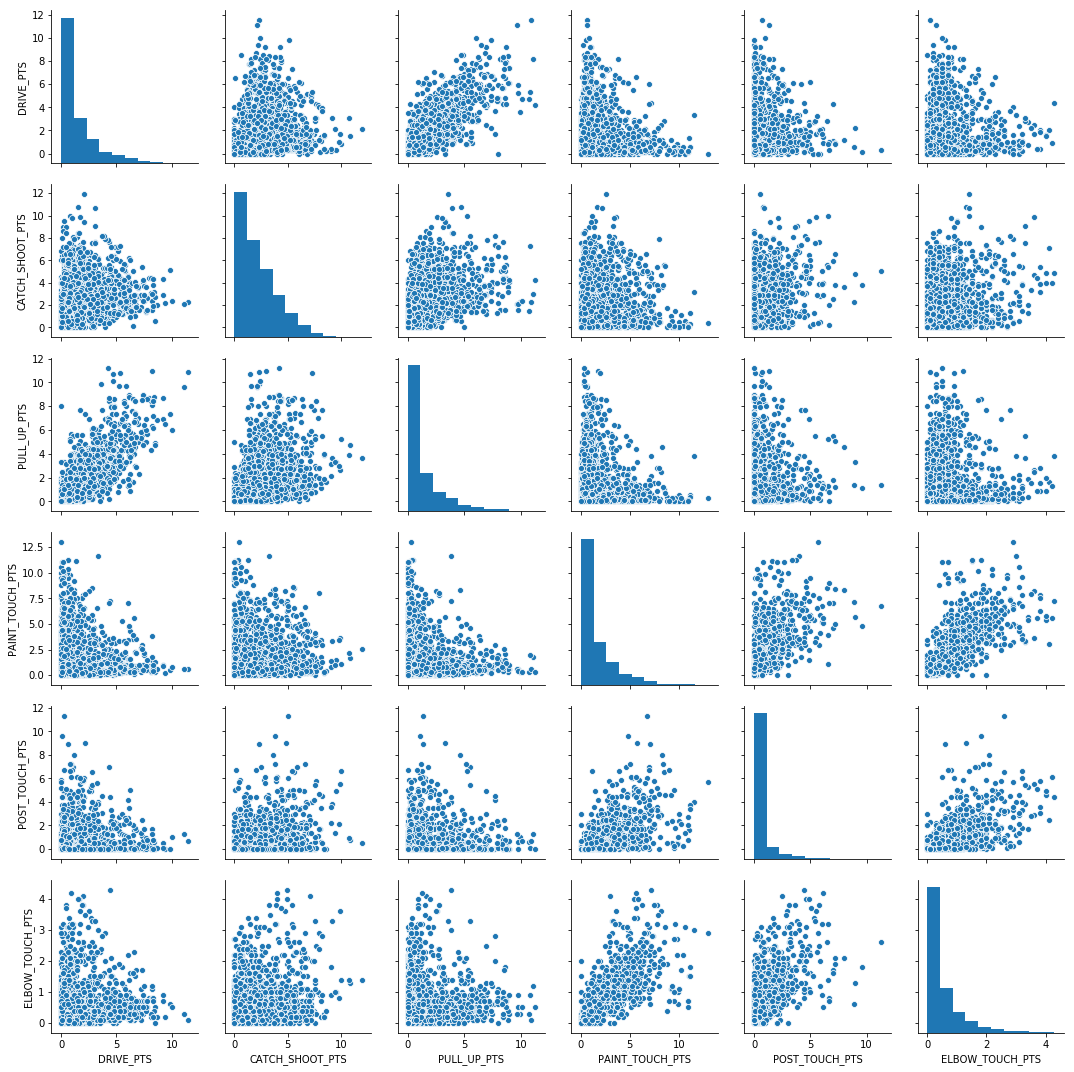

In [64]:
sns.pairplot(shooting_efficiency.loc[:, points_columns]);